In [1]:
# One time use - upgrade pip and install packages
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install findspark
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn

In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [3]:
# May or may not need to execute this AGAIN based on the mood of the server.
# https://stackoverflow.com/a/55435955/10844976
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [4]:
# 2.3
df = spark.read.option("header",True).option("inferSchema",True).csv('../dataset/cardio_train_preprocessed.csv')
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



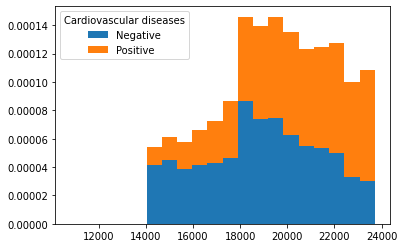

In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

n_bins = 20
pds = df.toPandas()
df_cardio_0 = pds[pds["cardio"]==0]
df_cardio_1 = pds[pds["cardio"]==1]
df_cardio_label = ["Negative", "Positive"]
x = [df_cardio_0["age"], df_cardio_1["age"]]

plt.hist(x, n_bins, density=True, histtype='bar', stacked=True, label=df_cardio_label)
plt.legend(title='Cardiovascular diseases')
plt.show()

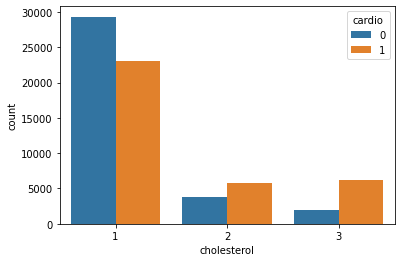

In [6]:
import seaborn as sns
ax = sns.countplot(x="cholesterol",hue="cardio",data=pds)
plt.show()

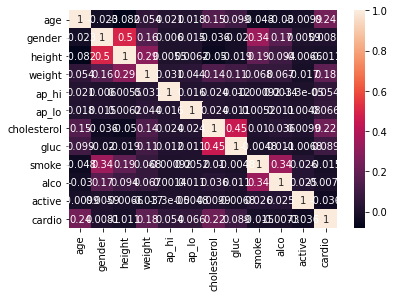

In [7]:
corr = df.toPandas().drop(["id"], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
# Reference: https://stackoverflow.com/a/44631639/10844976
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [9]:
# import pyspark.sql.functions as f
# df_mean = df.select(*[f.mean(c).alias(c) for c in df.columns])
# df_stddev = df.select(*[f.stddev(c).alias(c) for c in df.columns])
# df.select([count((c - f.mean(c)) / f.stddev(c)).alias(c) for c in df.columns]).show()

import numpy as np
from scipy import stats

pds = df.toPandas()
z_score = np.abs(stats.zscore(pds))
outliers = sum(z_score > 3)
pretty_outliers = list(zip(pds.columns, outliers))

<AxesSubplot:xlabel='age'>

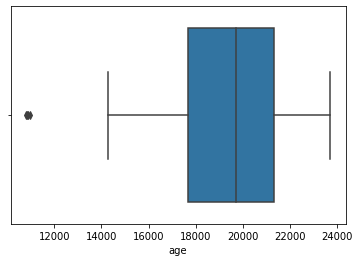

In [10]:
sns.boxplot(x=pds['age'])

In [11]:
df.select("age").orderBy(col("age").asc()).limit(20).show()
df.select("age").orderBy(col("age").desc()).limit(20).show()

+-----+
|  age|
+-----+
|10798|
|10859|
|10878|
|10964|
|14275|
|14277|
|14282|
|14284|
|14287|
|14291|
|14291|
|14291|
|14292|
|14293|
|14293|
|14294|
|14294|
|14295|
|14295|
|14296|
+-----+

+-----+
|  age|
+-----+
|23713|
|23701|
|23692|
|23690|
|23687|
|23684|
|23678|
|23677|
|23675|
|23675|
|23673|
|23673|
|23672|
|23670|
|23670|
|23670|
|23668|
|23668|
|23668|
|23667|
+-----+



<AxesSubplot:xlabel='height'>

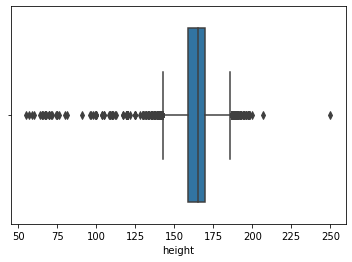

In [12]:
sns.boxplot(x=pds['height'])

In [13]:
df.select("height").orderBy(col("height").asc()).limit(20).show()

+------+
|height|
+------+
|    55|
|    57|
|    59|
|    60|
|    64|
|    65|
|    65|
|    66|
|    67|
|    67|
|    67|
|    68|
|    68|
|    70|
|    70|
|    70|
|    71|
|    72|
|    74|
|    75|
+------+



<AxesSubplot:xlabel='weight'>

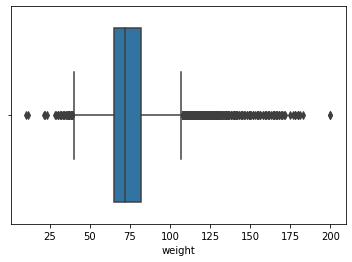

In [14]:
sns.boxplot(x=pds['weight'])

<AxesSubplot:xlabel='ap_hi'>

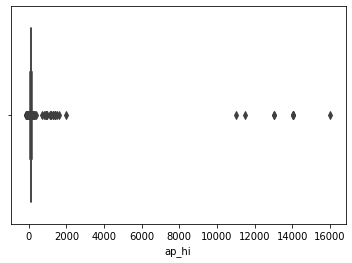

In [15]:
sns.boxplot(x=pds['ap_hi'])

In [16]:
df.select("ap_hi").orderBy(col("ap_hi").desc()).limit(20).show()

+-----+
|ap_hi|
+-----+
|16020|
|14020|
|14020|
|14020|
|14020|
|13010|
|13010|
|11500|
|11020|
| 2000|
| 1620|
| 1500|
| 1420|
| 1420|
| 1409|
| 1400|
| 1400|
| 1400|
| 1300|
| 1300|
+-----+



<AxesSubplot:xlabel='ap_hi'>

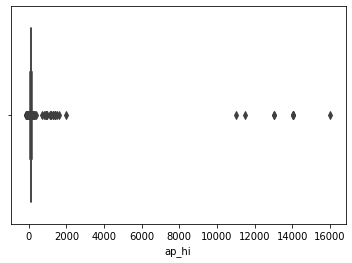

In [17]:
sns.boxplot(x=pds['ap_hi'])

In [18]:
id_to_remove = np.where((z_score[:,5]>3) | (z_score[:,6]>3))
id_col = pds.drop(pds.index[id_to_remove], inplace=False, axis=0)['id']
df_remove_outliers = df.filter(df.id.isin(id_col.tolist()))
#id_to_remove

# pds[pds.index.isin(id_to_remove[0].tolist())]
#id_col.tolist()

#pds.filter(pds.index[id_to_remove])

#pds.mask(pds.index.isin(id_to_remove[0].tolist()))


#id_col

#pds['id'].isin([2,4,5])

In [19]:
df_remove_outliers.select("ap_hi").orderBy(col("ap_hi").desc()).limit(20).show()

+-----+
|ap_hi|
+-----+
|  401|
|  309|
|  240|
|  240|
|  240|
|  240|
|  240|
|  240|
|  240|
|  230|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
+-----+



In [20]:
# https://www.xspdf.com/resolution/51834094.html#:~:text=Pyspark%20count%20number%20of%20distinct%20values%20in%20column&text=Distinct%20value%20of%20the%20column,distinct%20value%20of%20the%20column.
#from pyspark.sql.functions import countDistinct

#df_remove_outliers.select(countDistinct(col(c)).alias(c) for c in df_remove_outliers.columns)

df_remove_outliers.toPandas().nunique(axis=0)

id             69011
age             8067
gender             2
height           108
weight           281
ap_hi            126
ap_lo             97
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [21]:
# 3.3
df_remove_outliers = df_remove_outliers.withColumn('high_blood_pressure',
                                                   (when((df_remove_outliers.ap_hi >= 140) & (df_remove_outliers.ap_lo >= 90),1).otherwise(0)))

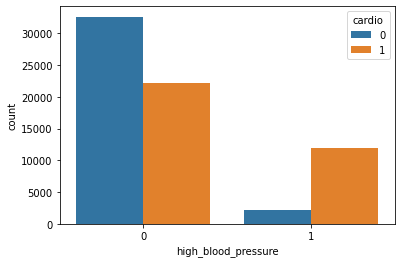

In [22]:
sns.countplot(x="high_blood_pressure",hue="cardio",data=df_remove_outliers.toPandas())
plt.show()

In [23]:
columns_to_drop = ['ap_hi','ap_lo']
df_remove_outliers = df_remove_outliers.drop(*columns_to_drop)

In [24]:
# 3.4
# inner_join = df1.join(df2, df1.id == df2.id)

In [25]:
# df1 = df1.unionByName(df2)

In [26]:
# 3.5
df_remove_outliers.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = false)



In [27]:
df_typed = df_remove_outliers # Rename
# df_typed = df_typed.withColumn('is_female', (df_typed.gender == 1))
# df_typed = df_typed.withColumn('is_smoke', (df_typed.smoke == 1))
# df_typed = df_typed.withColumn('is_alco', (df_typed.alco == 1))
# df_typed = df_typed.withColumn('is_active', (df_typed.active == 1))
# df_typed = df_typed.withColumn('is_cardio', (df_typed.cardio == 1))
# columns_to_drop = ['gender','smoke','alco','active','cardio']
# df_typed = df_typed.drop(*columns_to_drop)

In [28]:
df_typed.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = false)



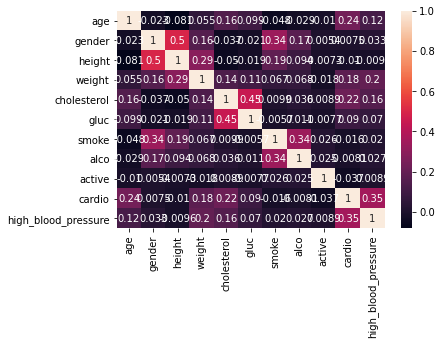

In [29]:
# 4.1
corr = df_typed.drop('id').toPandas().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

In [30]:
columns_to_drop = ['smoke','alco','gender']
df_typed = df_typed.drop(*columns_to_drop)

In [31]:
df_typed = df_typed.withColumn('bmi', (df_typed.weight / (df_typed.height ** 2) * 10000))
df_typed = df_typed.withColumn('weight_status', (when(col("bmi") < 25, 1).when(col("bmi") >= 30, 3).otherwise(2)))
columns_to_drop = ['height','weight','bmi']
df_typed = df_typed.drop(*columns_to_drop)

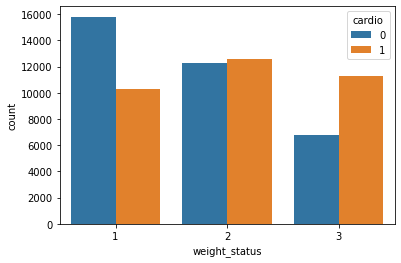

In [32]:
ax = sns.countplot(x="weight_status",hue="cardio",data=df_typed.toPandas())
plt.show()

In [33]:
# Gabbbage
# from pyspark.ml.linalg import Vectors
# from pyspark.ml.feature import VectorIndexer
# from pyspark.ml.classification import DecisionTreeClassifier

# stringIndexer = StringIndexer(inputCol="is_cardio", outputCol="indexed")
# si_model = stringIndexer.fit(df_typed)

# vectorIndexer = VectorIndexer(inputCol=[""])

# dt = DecisionTreeClassifier(maxDepth=3, labelCol="is_cardio")

# https://stackoverflow.com/questions/32556178/create-labeledpoints-from-spark-dataframe-in-python

# "high_blood_pressure", "is_active", "is_cardio", 

# assembler = VectorAssembler(
#     inputCols=["age", "cholesterol", "gluc", "weight_staus"],
#     outputCol="features")

In [34]:
df_typed.show()

+---+-----+-----------+----+------+------+-------------------+-------------+
| id|  age|cholesterol|gluc|active|cardio|high_blood_pressure|weight_status|
+---+-----+-----------+----+------+------+-------------------+-------------+
|  0|18393|          1|   1|     1|     0|                  0|            1|
|  1|20228|          3|   1|     1|     1|                  1|            3|
|  2|18857|          3|   1|     0|     1|                  0|            1|
|  3|17623|          1|   1|     1|     1|                  1|            2|
|  4|17474|          1|   1|     0|     0|                  0|            1|
|  8|21914|          2|   2|     0|     0|                  0|            2|
|  9|22113|          3|   1|     1|     0|                  0|            3|
| 12|22584|          3|   3|     1|     1|                  0|            2|
| 13|17668|          1|   1|     1|     0|                  0|            2|
| 14|19834|          1|   1|     0|     0|                  0|            2|

In [35]:
# 6.3
# Reorder and save
# Note this is the feature index - PySpark's machine learning can't remember feature names
df_typed = df_typed.select(df_typed.cardio,
                           df_typed.age, #0
                           df_typed.cholesterol, #1
                           df_typed.gluc, #2
                           df_typed.active, #3
                           df_typed.high_blood_pressure, #4
                           df_typed.weight_status) #5

import os.path
if not os.path.exists("df_typed"):
    df_typed.write.csv('df_typed')

In [36]:
# Preparation
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])

data = sc.textFile("df_typed")
parsedData = data.map(parsePoint)

In [37]:
# Decision Tree
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
model_dt = DecisionTree.trainClassifier(parsedData, numClasses=2, categoricalFeaturesInfo={},
                                     impurity='gini', maxDepth=3, maxBins=8)

In [38]:
print(model_dt.toDebugString())

DecisionTreeModel classifier of depth 3 with 15 nodes
  If (feature 4 <= 0.0)
   If (feature 1 <= 2.0)
    If (feature 0 <= 19697.0)
     Predict: 0.0
    Else (feature 0 > 19697.0)
     Predict: 0.0
   Else (feature 1 > 2.0)
    If (feature 2 <= 2.0)
     Predict: 1.0
    Else (feature 2 > 2.0)
     Predict: 1.0
  Else (feature 4 > 0.0)
   If (feature 2 <= 2.0)
    If (feature 0 <= 17643.0)
     Predict: 1.0
    Else (feature 0 > 17643.0)
     Predict: 1.0
   Else (feature 2 > 2.0)
    If (feature 1 <= 1.0)
     Predict: 1.0
    Else (feature 1 > 1.0)
     Predict: 1.0



In [39]:
# SVM
from pyspark.mllib.classification import SVMWithSGD, SVMModel
model_svm = SVMWithSGD.train(parsedData, iterations=100)

In [40]:
# https://stackoverflow.com/questions/54662701/how-to-split-columns-into-label-and-features-in-pyspark
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["age", "cholesterol", "gluc", "active", "high_blood_pressure", "weight_status"],
    outputCol="features")

df_assembled = assembler.transform(df_typed)
df_assembled = df_assembled.select(df_assembled.cardio, df_assembled.features).withColumnRenamed("cardio","label")

In [41]:
df_assembled.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[18393.0,1.0,1.0,...|
|    1|[20228.0,3.0,1.0,...|
|    1|[18857.0,3.0,1.0,...|
|    1|[17623.0,1.0,1.0,...|
|    0|[17474.0,1.0,1.0,...|
|    0|[21914.0,2.0,2.0,...|
|    0|[22113.0,3.0,1.0,...|
|    1|[22584.0,3.0,3.0,...|
|    0|[17668.0,1.0,1.0,...|
|    0|[19834.0,1.0,1.0,...|
|    0|[22530.0,1.0,1.0,...|
|    0|[18815.0,1.0,1.0,...|
|    0|[14791.0,1.0,1.0,...|
|    0|[19809.0,1.0,1.0,...|
|    0|[14532.0,1.0,1.0,...|
|    1|[16782.0,1.0,1.0,...|
|    0|[21296.0,1.0,1.0,...|
|    0|[16747.0,1.0,3.0,...|
|    0|[17482.0,1.0,1.0,...|
|    0|[21755.0,1.0,1.0,...|
+-----+--------------------+
only showing top 20 rows



In [42]:
# Neural network
# https://spark.apache.org/docs/latest/ml-classification-regression.html#multilayer-perceptron-classifier
from pyspark.ml.classification import MultilayerPerceptronClassifier

# data = spark.read.format("libsvm")\
#     .load("data/mllib/sample_multiclass_classification_data.txt")

# specify layers for the neural network:
# input layer of size 7 (features), two intermediate of size 8 and 4,
# and output of size 2 (classes)
layers = [6, 8, 4, 2]

# create the trainer and set its parameters
trainer_nn = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# train the model
model_nn = trainer_nn.fit(df_assembled)

In [43]:
# 7.1
# Split the data into train and test
splits = parsedData.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

In [44]:
train.count()

48308

In [45]:
test.count()

20703

In [47]:
# Decision Tree
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
model_dt_train = DecisionTree.trainClassifier(train, numClasses=2, categoricalFeaturesInfo={},
                                     impurity='gini', maxDepth=3, maxBins=8)

# https://spark.apache.org/docs/2.2.0/mllib-decision-tree.html
pred = model_dt_train.predict(test.map(lambda x: x.features))
labelsAndPredictions = test.map(lambda lp: lp.label).zip(pred)
testAcc = labelsAndPredictions.filter(
    lambda lp: lp[0] == lp[1]).count() / float(test.count())

In [ ]:
testAcc

In [48]:
# SVM
from pyspark.mllib.classification import SVMWithSGD, SVMModel
model_svm = SVMWithSGD.train(train, iterations=100)

pred = model_svm.predict(test.map(lambda x: x.features))
labelsAndPredictions = test.map(lambda lp: lp.label).zip(pred)
testAcc = labelsAndPredictions.filter(
    lambda lp: lp[0] == lp[1]).count() / float(test.count())

ConnectionResetError: [Errno 104] Connection reset by peer

In [ ]:
testAcc

In [ ]:
# Neural Network
from pyspark.ml.classification import MultilayerPerceptronClassifier

splits = df_typed.randomSplit([0.7, 0.3], 1234)
train_assembled = splits[0]
test_assembled = splits[1]

model_nn = trainer_nn.fit(df_assembled)

In [ ]:
splits = df_typed.randomSplit([0.7, 0.3], 1234)
train_assembled = splits[0]
test_assembled = splits[1]

In [ ]:
model_nn = trainer_nn.fit(df_assembled)

In [ ]:

# df_typed_features = df_typed.drop('cardio',axis=1)
# X = df_typed_features
# Y = df_typed['cardio']
# clf_tree = tree.DecisionTreeClassifier(max_depth=3).fit(X, Y)

# import graphviz
# dot_data = tree.export_graphviz(clf_tree,
#     out_file=None,
#     feature_names=list(df_typed_features.columns),
#     class_names=["Negative", "Positive"], # Comment under https://datascience.stackexchange.com/q/20415 by Takashi Yoshino: You can check clf.classes_ to confirm class order.
#     filled=True,
#     rounded=True)
# graph = graphviz.Source(dot_data) 
# graph.render("tree")

In [52]:
df_typed.show()

+------+-----+-----------+----+------+-------------------+-------------+
|cardio|  age|cholesterol|gluc|active|high_blood_pressure|weight_status|
+------+-----+-----------+----+------+-------------------+-------------+
|     0|18393|          1|   1|     1|                  0|            1|
|     1|20228|          3|   1|     1|                  1|            3|
|     1|18857|          3|   1|     0|                  0|            1|
|     1|17623|          1|   1|     1|                  1|            2|
|     0|17474|          1|   1|     0|                  0|            1|
|     0|21914|          2|   2|     0|                  0|            2|
|     0|22113|          3|   1|     1|                  0|            3|
|     1|22584|          3|   3|     1|                  0|            2|
|     0|17668|          1|   1|     1|                  0|            2|
|     0|19834|          1|   1|     0|                  0|            2|
|     0|22530|          1|   1|     1|             